# **Data Preprocessing**

**NB: My dataset is from a company which posts are daily on their facebook and also post a single post a day.**




In [1]:
#Importing nessecary libaries and dependecies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Enviroment setup for MODEL
RANDOM_SEED = 42
%matplotlib inline

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Showing the first five rows of the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/jhhh.csv")
data.head()

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Daily Organic Reach,Daily Organic impressions,Daily Viral impressions,Daily Logged-in Page Views,Daily Organic Reach of Page posts,Daily Organic impressions of your posts,Daily Total Consumers,Daily Total Check-Ins Using Mobile Devices,Daily Video Repeats
0,07/02/2021,3.0,2.0,29,918,1456,1258,24.0,918,1456,24,NaN,3.0
1,08/02/2021,3.0,2.0,22,553,1093,895,25.0,553,1093,14,NaN,5.0
2,09/02/2021,1.0,NaN,91,2240,3296,2338,34.0,2240,3296,64,NaN,11.0
3,10/02/2021,3.0,1.0,19,615,1137,872,21.0,615,1137,12,NaN,9.0
4,11/02/2021,NaN,1.0,11,439,743,655,16.0,439,743,8,NaN,5.0


In [5]:
#Changing all the Not a Number (NaN) values to zero (0)
data.fillna(0, inplace=True)

In [6]:
#Checking the data types of each data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Date                                        28 non-null     object 
 1   Daily New Likes                             28 non-null     float64
 2   Daily Unlikes                               28 non-null     float64
 3   Daily Page Engaged Users                    28 non-null     int64  
 4   Daily Organic Reach                         28 non-null     int64  
 5   Daily Organic impressions                   28 non-null     int64  
 6   Daily Viral impressions                     28 non-null     int64  
 7   Daily Logged-in Page Views                  28 non-null     float64
 8   Daily Organic Reach of Page posts           28 non-null     int64  
 9   Daily Organic impressions of your posts     28 non-null     int64  
 10  Daily Total Cons

*I changed all the NaN values to zero so that I can use the dataset to create a model for further evaluation and then I cheked to see the data types of each of the values to see if there were still non-numerical values since both a barplot for visulization and model for further evaluation doesn't accept non-numerical values*

#**My First Conclusion Based On The Dataset Visualization**
***Based on the visualizations of daily consumer metrics below, including likes, dislikes, engagement, and replays, my recommendation to the company is to strategically focus on generating content akin to the exceptionally successful post dated 02/03/2021. The data indicates this content outperformed others. Additionally, content posted on 18/06/2021 also exhibited noteworthy performance, suggesting a potential template for future success.***

<Axes: xlabel='Daily New Likes', ylabel='Date'>

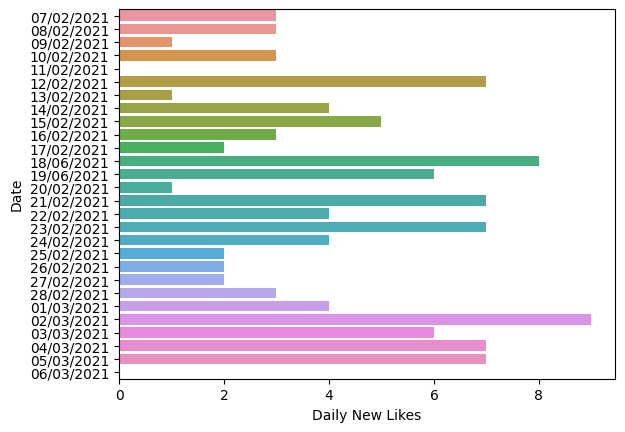

In [7]:
# The number of people who liked the company's post per day
sns.barplot(x = 'Daily New Likes', y = 'Date' , data = data,)

<Axes: xlabel='Daily Unlikes', ylabel='Date'>

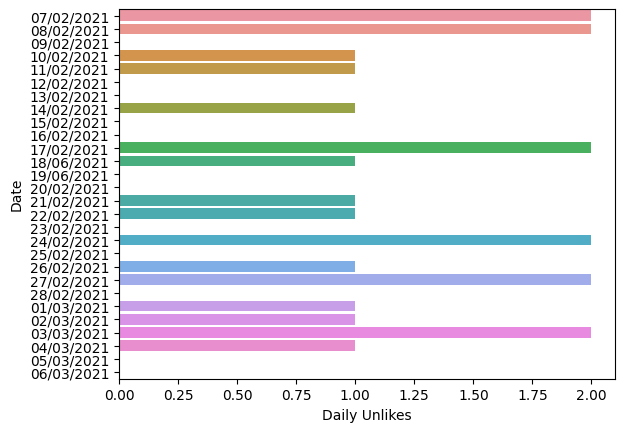

In [8]:
# The number of people who unliked the company's post per day
sns.barplot(x = 'Daily Unlikes', y = 'Date' , data = data,)

<Axes: xlabel='Daily Page Engaged Users', ylabel='Date'>

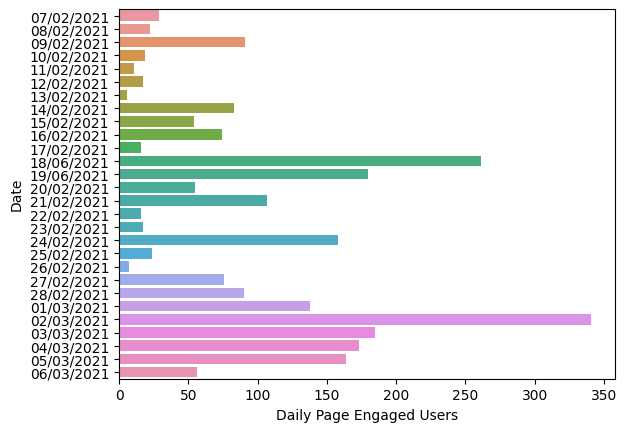

In [9]:
# The number of people who engaged with the company's post per day
sns.barplot(x = 'Daily Page Engaged Users', y = 'Date' , data = data,)

<Axes: xlabel='Daily Video Repeats', ylabel='Date'>

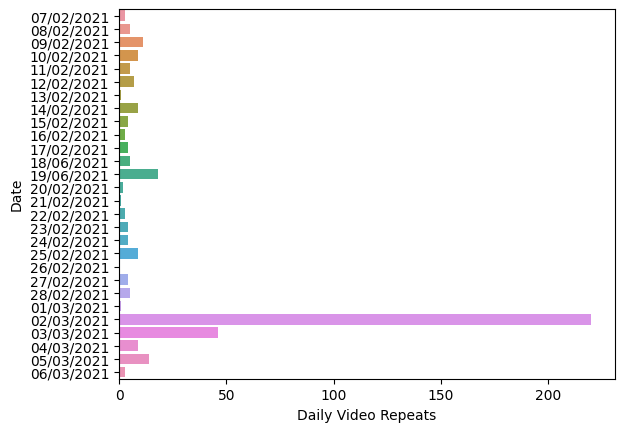

In [10]:
# The number of times people played a posted video by the company after the first time per day
sns.barplot(x = 'Daily Video Repeats', y = 'Date' , data = data,)

In [11]:
#Defining x and y
x = data[['Daily Unlikes', 'Daily Video Repeats', 'Daily Page Engaged Users']].values
y = data['Daily New Likes'].values

In [12]:
#Splitting the datset into testing and traininig set and checking the shape of x_train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=RANDOM_SEED )
x_train.shape

(22, 3)

In [13]:
#Checking the shape of x_train
y_train.shape

(22,)

In [14]:
# Standardize data based on mean & sd of x_train

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# **Building A Linear Regression Model**

*The model is being built to futher analyse the data in  dataset*

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [16]:
# Creating a linear regression model
model = LinearRegression()

In [17]:
# Training the model
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Making predictions on the test set
y_pred = model.predict(x_test)

***The summary of the model's evaluation below,  the squared difference between the predicted and actual 'Daily New Likes' values is approximately 1.181 and the  Coefficients of Daily Unlikes, Daily Video Repeats and Daily Page Engaged Users are: ( -0.1863, 0.0966, 1.6995 respectively) while the  intercept term is 3.8182 which means that  when 'Daily Unlikes,' 'Daily Video Repeats,' and 'Daily Page Engaged Users' are all zero, when the predicted 'Daily New Likes' is approximately 3.8182.***

#**My Second Conclusion Based On The Model's Performance**
***The model's performance suggests that 'Daily Page Engaged Users' has the most significant positive impact on predicting 'Daily New Likes,' while 'Daily Unlikes' has a negative impact. 'Daily Video Repeats' has a positive impact, but to a lesser extent. "So I can say that the model's performance complement the dataset visualization therefore my first conclusion is right"***

In [19]:
#The meaan squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.1810754848951501


In [20]:
# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.18627418  0.09658598  1.69949329]
Intercept: 3.8181818181818183


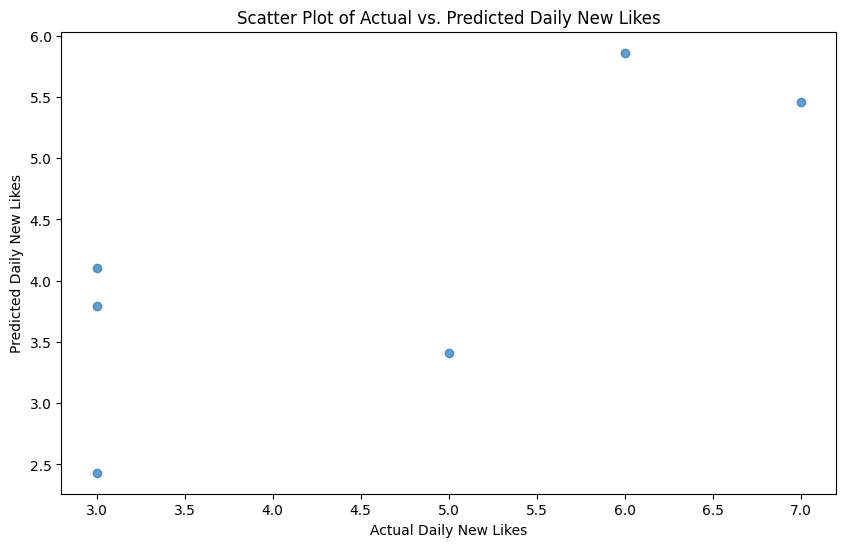

In [21]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Scatter Plot of Actual vs. Predicted Daily New Likes')
plt.xlabel('Actual Daily New Likes')
plt.ylabel('Predicted Daily New Likes')
plt.show()
